In [45]:
import pandas as pd

# df = pd.read_csv('../res/crawl_investor_daily_volume.csv').fillna(0)
df = pd.read_csv('../res/crwal_investor_stock_type.csv') #, index_col='DATEON'
#df = df.sort_values(by=['DATEON'], axis=0, ascending=True)
df['DATEON'] = df['DATEON'].str[2:]
df = df.set_index('DATEON')

df2 = pd.read_csv('../res/crawl_investor_daily_volume.csv')
#df2 = df2.drop('TYPE_CODE')
df3 = pd.merge(left=df, right=df2, how='inner', left_on='DATEON', right_on='DATEON')
# df3 = df3.drop('TYPE_CODE')
df3

,DATEON,TYPE_CODE_x,END_VALUE,DELTA,UPDOWN_PER,VOLUME,COMP_BUY,FOR_BUY,FOR_CONT,FOR_PER,...,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND
0,16.01.13,233740,11570.0,520.0,4.71,1750580.0,-41337.0,0.0,0.0,0.00,...,-1885.0,-503.0,2206.0,-156.0,907.0,1191.0,14.0,7.0,243.0,183.0
1,16.01.14,233740,11445.0,-125.0,-1.08,1795910.0,55991.0,0.0,0.0,0.00,...,2957.0,-3730.0,436.0,-825.0,547.0,452.0,27.0,-2.0,237.0,337.0
2,16.01.15,233740,11230.0,-215.0,-1.88,2078430.0,-210233.0,0.0,0.0,0.00,...,2517.0,-2168.0,-680.0,-323.0,575.0,-1043.0,-19.0,-41.0,170.0,331.0
3,16.01.18,233740,11575.0,345.0,3.07,1900820.0,89002.0,0.0,0.0,0.00,...,121.0,-3463.0,3186.0,1046.0,773.0,1240.0,20.0,18.0,89.0,156.0
4,16.01.19,233740,11550.0,-25.0,-0.22,2014000.0,166403.0,0.0,0.0,0.00,...,879.0,-2792.0,1772.0,-203.0,415.0,1503.0,37.0,23.0,-3.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,24.07.22,233740,10210.0,-530.0,-4.93,25376100.0,-10601000.0,-671720.0,50339.0,0.05,...,1414.0,-845.0,-238.0,1520.0,-73.0,-703.0,-38.0,-7.0,-936.0,-332.0
2096,24.07.23,233740,10275.0,65.0,0.64,20878400.0,-990217.0,192766.0,343105.0,0.32,...,-1990.0,2502.0,-246.0,-1064.0,86.0,769.0,-137.0,-35.0,137.0,-266.0
2097,24.07.24,233740,10360.0,85.0,0.83,18236500.0,1033550.0,160263.0,603368.0,0.55,...,2345.0,-2654.0,410.0,62.0,165.0,382.0,-51.0,-21.0,-127.0,-101.0
2098,24.07.25,233740,9935.0,-425.0,-4.10,27670600.0,-8731450.0,-560720.0,42648.0,0.04,...,8267.0,-6785.0,-1529.0,-3.0,-7.0,-1247.0,-139.0,82.0,-216.0,48.0


In [46]:


df3['FOR_BUY_D14']=df3.FOR_BUY.rolling(14).sum().shift(1)
df3['FOR_BUY_D7']=df3.FOR_BUY.rolling(7).sum().shift(1)
df3['COMP_BUY_D14']=df3.COMP_BUY.rolling(14).sum().shift(1)
df3['COMP_BUY_D7']=df3.COMP_BUY.rolling(7).sum().shift(1)

df3['DELTA_OUT']=df3.UPDOWN_PER.shift(-1)

# df = df[['DATEON', 'END_VALUE', 'DELTA_OUT', 'VOLUME', 'UPDOWN_PER', 'COMP_BUY', 'COMP_BUY_D7', 'COMP_BUY_D14', 'FOR_BUY', 'FOR_BUY_D7', 'FOR_BUY_D14']]

df3 = df3.dropna()
df3.fillna(0)

# df3 = df3.sort_values(by=['DATEON'], axis=0, ascending=True)
# df3['DATEON'] = df3['DATEON'].apply(lambda x: f"str{x}")
df3.columns

Index(['DATEON', 'TYPE_CODE_x', 'END_VALUE', 'DELTA', 'UPDOWN_PER', 'VOLUME',
       'COMP_BUY', 'FOR_BUY', 'FOR_CONT', 'FOR_PER', 'TYPE_CODE_y', 'PERSONAL',
       'FOREIGNER', 'COMPANY', 'FINANCE', 'INSURANCE', 'TOOSIN', 'BANK',
       'ETC_FIN', 'GOV_FUND', 'ETC_FUND', 'FOR_BUY_D14', 'FOR_BUY_D7',
       'COMP_BUY_D14', 'COMP_BUY_D7', 'DELTA_OUT'],
      dtype='object')

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

/var/folders/lr/mv7qs1n11s58s4mq9t7vlxr40000gn/T/ipykernel_78913/2094469293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['DATEON'] = pd.to_datetime(df3.DATEON, format='%y.%m.%d')


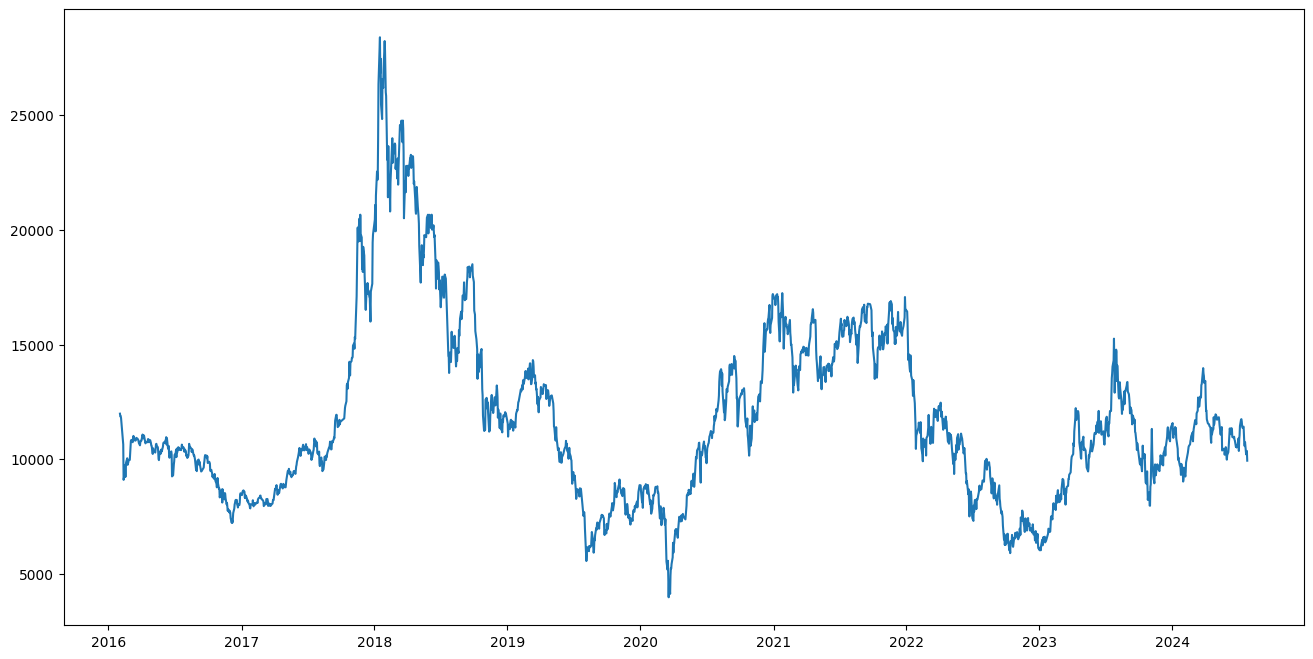

In [50]:
df3

df3['DATEON'] = pd.to_datetime(df3.DATEON, format='%y.%m.%d')
df3.index = df3['DATEON']

plt.figure(figsize=(16, 8))
plt.plot(df3["END_VALUE"], label='Close Price History')